# Exploring the dataset ...

In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
color = sns.color_palette()

# %matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [3]:
print(check_output(["ls", "../Input"]).decode("utf8"))

properties_2016.csv
sample_submission.csv
train_2016_v2.csv
zillow_data_dictionary.xlsx



In [6]:
# Contains information about the transactions
train_df = pd.read_csv("../Input/train_2016_v2.csv", parse_dates=["transactiondate"])
train_df.shape
train_df.head()
# train_df.shape[0]

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [10]:
# Contains information about the properties
properties_df = pd.read_csv("../Input/properties_2016.csv")
properties_df.shape
properties_df.head()
# train_df.shape[0]

C:\Users\dhava\AppData\Local\Continuum\Anaconda2\envs\neuralnets\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [12]:
renamed_columns = {'id_parcel' : 'parcelid',
  'build_year' : 'yearbuilt',
  'area_basement' : 'basementsqft',
  'area_patio' : 'yardbuildingsqft17',
  'area_shed' : 'yardbuildingsqft26', 
  'area_pool' : 'poolsizesum',  
  'area_lot' : 'lotsizesquarefeet', 
  'area_garage' : 'garagetotalsqft',
  'area_firstfloor_finished' : 'finishedfloor1squarefeet',
  'area_total_calc' : 'calculatedfinishedsquarefeet',
  'area_base' : 'finishedsquarefeet6',
  'area_live_finished' : 'finishedsquarefeet12',
  'area_liveperi_finished' : 'finishedsquarefeet13',
  'area_total_finished' : 'finishedsquarefeet15',  
  'area_unknown' : 'finishedsquarefeet50',
  'num_unit' : 'unitcnt', 
  'num_story' : 'numberofstories',  
  'num_room' : 'roomcnt',
  'num_bathroom' : 'bathroomcnt',
  'num_bedroom' : 'bedroomcnt',
  'num_bathroom_calc' : 'calculatedbathnbr',
  'num_bath' : 'fullbathcnt',  
  'num_75_bath' : 'threequarterbathnbr', 
  'num_fireplace' : 'fireplacecnt',
  'num_pool' : 'poolcnt',  
  'num_garage' : 'garagecarcnt',  
  'region_county' : 'regionidcounty',
  'region_city' : 'regionidcity',
  'region_zip' : 'regionidzip',
  'region_neighbor' : 'regionidneighborhood',  
  'tax_total' : 'taxvaluedollarcnt',
  'tax_building' : 'structuretaxvaluedollarcnt',
  'tax_land' : 'landtaxvaluedollarcnt',
  'tax_property' : 'taxamount',
  'tax_year' : 'assessmentyear',
  'tax_delinquency' : 'taxdelinquencyflag',
  'tax_delinquency_year' : 'taxdelinquencyyear',
  'zoning_property' : 'propertyzoningdesc',
  'zoning_landuse' : 'propertylandusetypeid',
  'zoning_landuse_county' : 'propertycountylandusecode',
  'flag_fireplace' : 'fireplaceflag', 
  'flag_tub' : 'hashottuborspa',
  'quality' : 'buildingqualitytypeid',
  'framing' : 'buildingclasstypeid',
  'material' : 'typeconstructiontypeid',
  'deck' : 'decktypeid',
  'story' : 'storytypeid',
  'heating' : 'heatingorsystemtypeid',
  'aircon' : 'airconditioningtypeid',
  'architectural_style' : 'architecturalstyletypeid'}
final_renamed_columns = {v: k for k, v in renamed_columns.items()}
properties_df = properties_df.rename(columns = final_renamed_columns)
properties_df.head()

,id_parcel,aircon,architectural_style,area_basement,num_bathroom,num_bedroom,framing,quality,num_bathroom_calc,deck,area_firstfloor_finished,area_total_calc,area_live_finished,area_liveperi_finished,area_total_finished,area_unknown,area_base,fips,num_fireplace,num_bath,num_garage,area_garage,flag_tub,heating,latitude,longitude,area_lot,num_pool,area_pool,pooltypeid10,pooltypeid2,pooltypeid7,zoning_landuse_county,zoning_landuse,zoning_property,rawcensustractandblock,region_city,region_county,region_neighbor,region_zip,num_room,story,num_75_bath,material,num_unit,area_patio,area_shed,build_year,num_story,flag_fireplace,tax_building,tax_total,tax_year,tax_land,tax_property,tax_delinquency,tax_delinquency_year,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [14]:
train_df = train_df.rename(columns = {'parcelid' : 'id_parcel', 'transactiondate':'date'})
properties_df["tax_delinquency"] = np.where(properties_df["tax_delinquency"] == "Y", 1, 0)
properties_df["flag_tub"] = np.where(properties_df["flag_tub"] == "Y", 1, 0)
properties_df["flag_fireplace"] = np.where(properties_df["flag_fireplace"] == "Y", 1, 0)

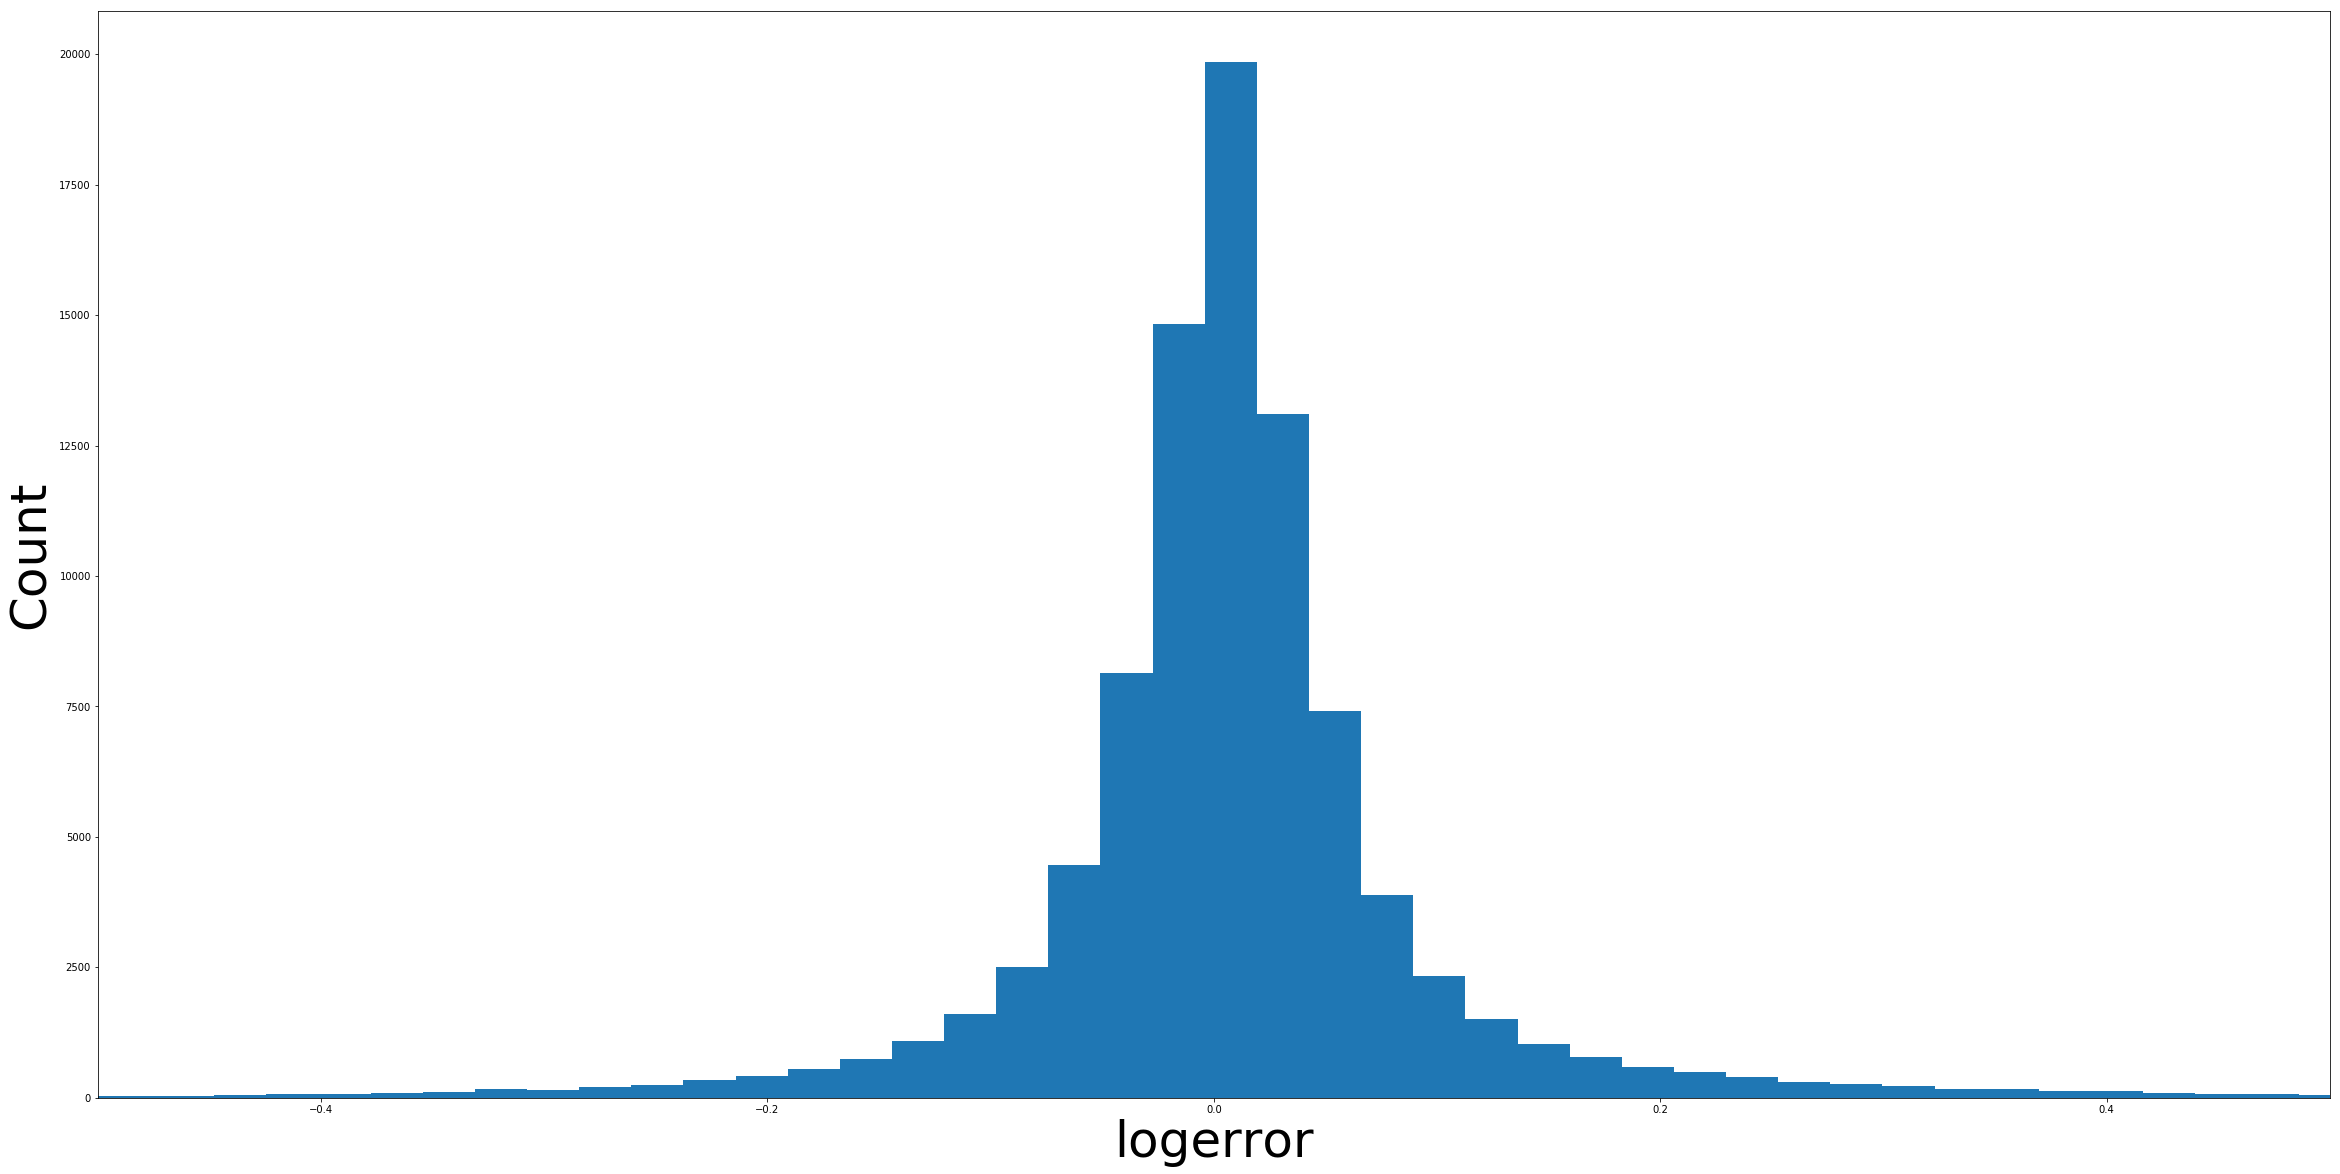

In [33]:
plt.figure(figsize=(40,20))
plt.hist(train_df["logerror"], bins = 400)
plt.xlabel("logerror", fontsize = 50)
plt.ylabel("Count", fontsize = 50)
plt.xlim(-0.5, 0.5)
plt.show()

## logerror = log(Zestimate) - log(Salesprice)
- From the above graph we can tell that if the logerror is positive, it means that Zillow is overestimating the Saleprice, and if the logerror is negative, it means that Zillow is underestimating the Salesprice.

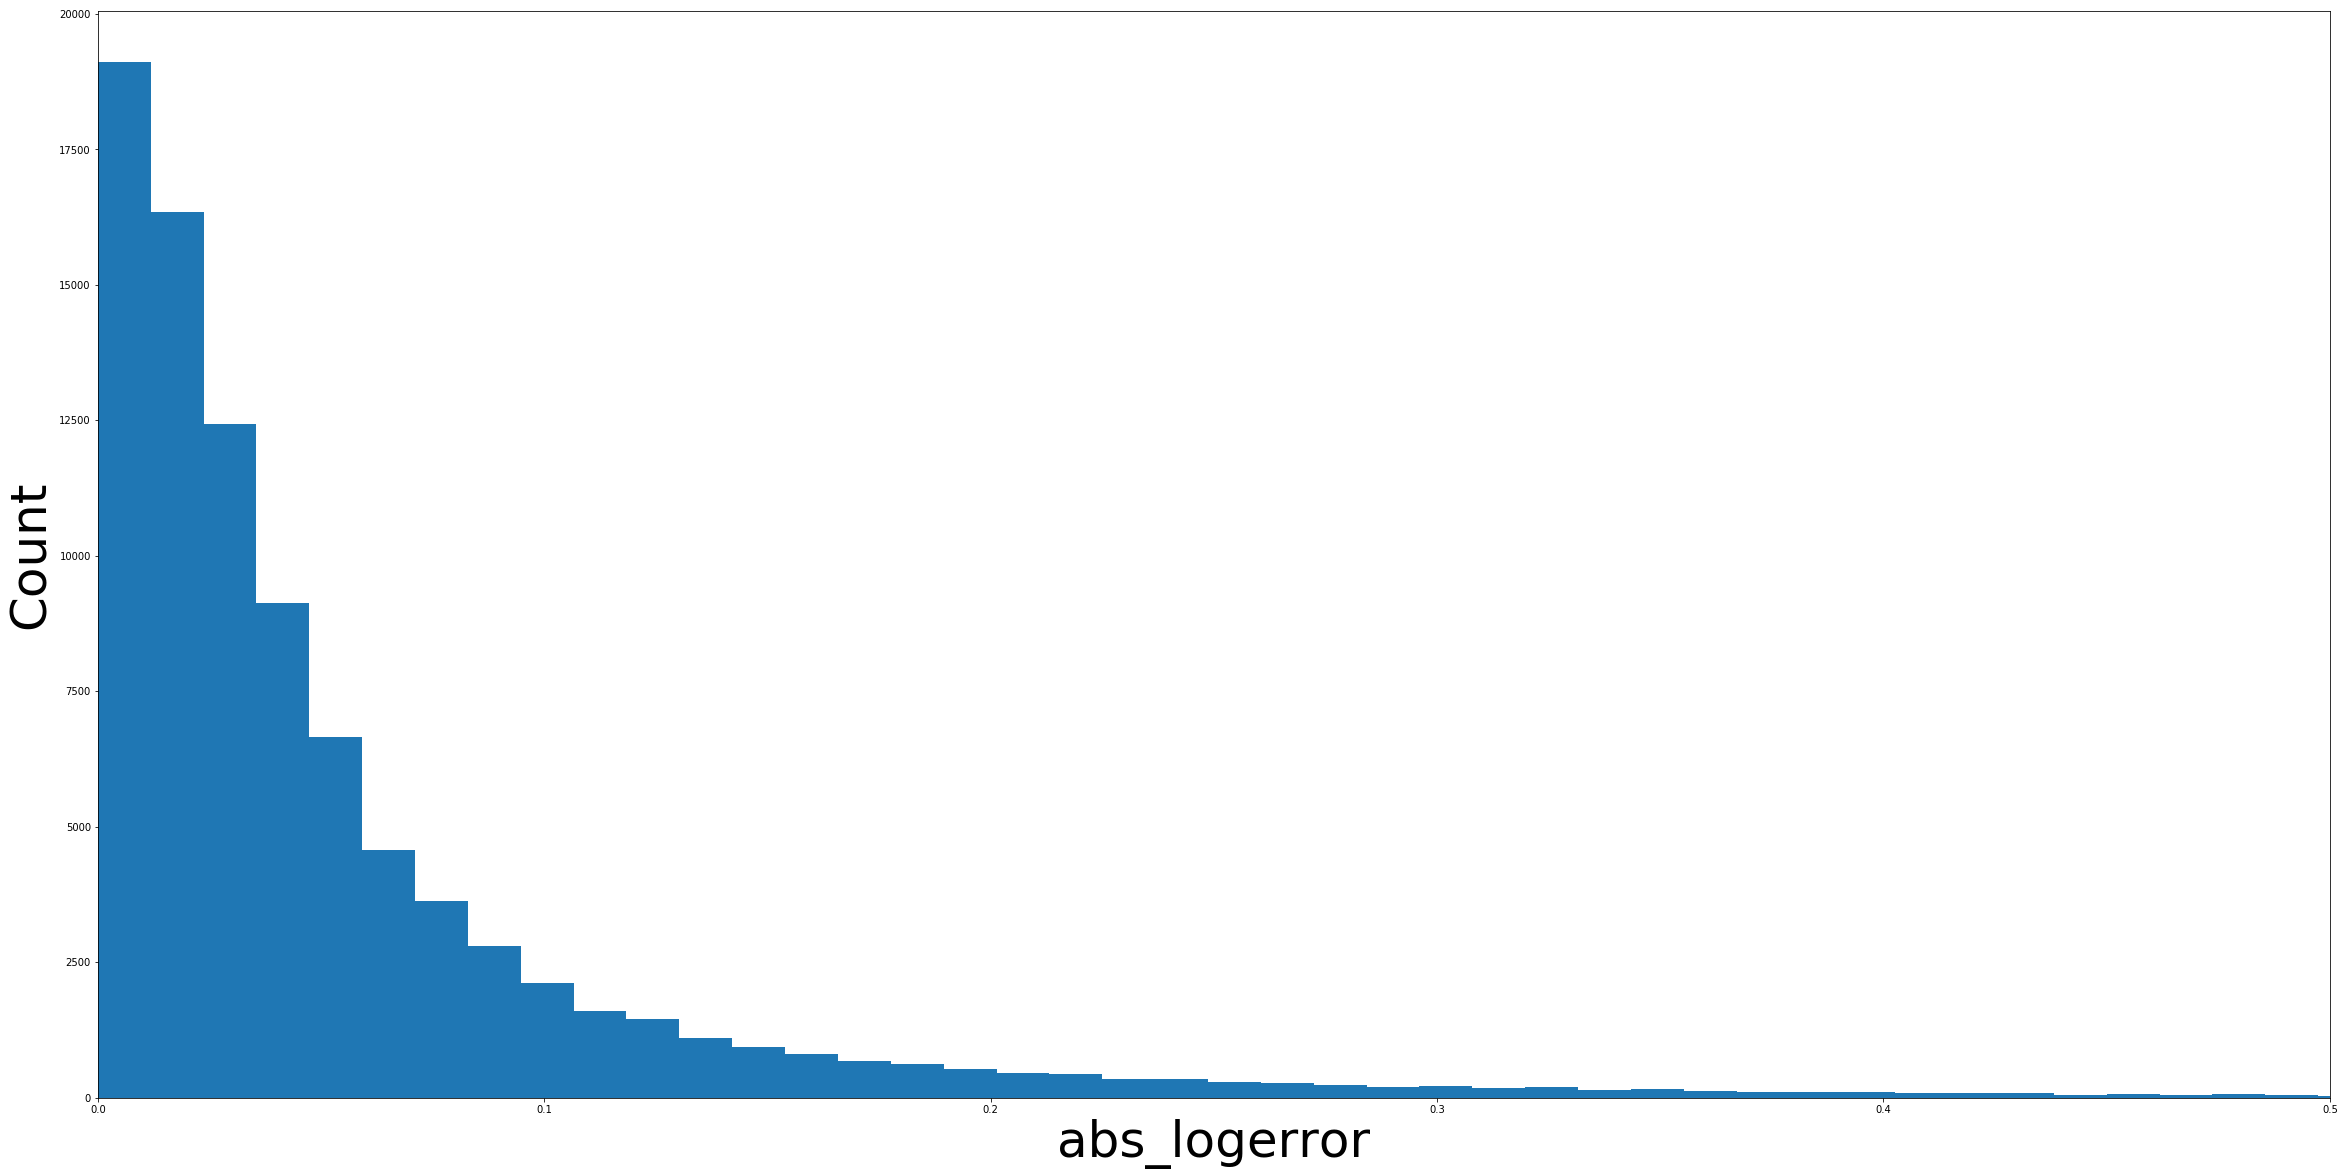

In [35]:
train_df["abs_logerror"] = abs(train_df["logerror"])
plt.figure(figsize=(40,20))
plt.hist(train_df["abs_logerror"], bins = 400)
plt.xlabel("abs_logerror", fontsize = 50)
plt.ylabel("Count", fontsize = 50)
plt.xlim(0, 0.5)
plt.show()

## abs_logerror:
- The absolute_logerror is a different angle to view at the logerror. A value close to zero tells us that Zestimate predictions are closer to the actual Salesprice.

### How logerror changes with time?

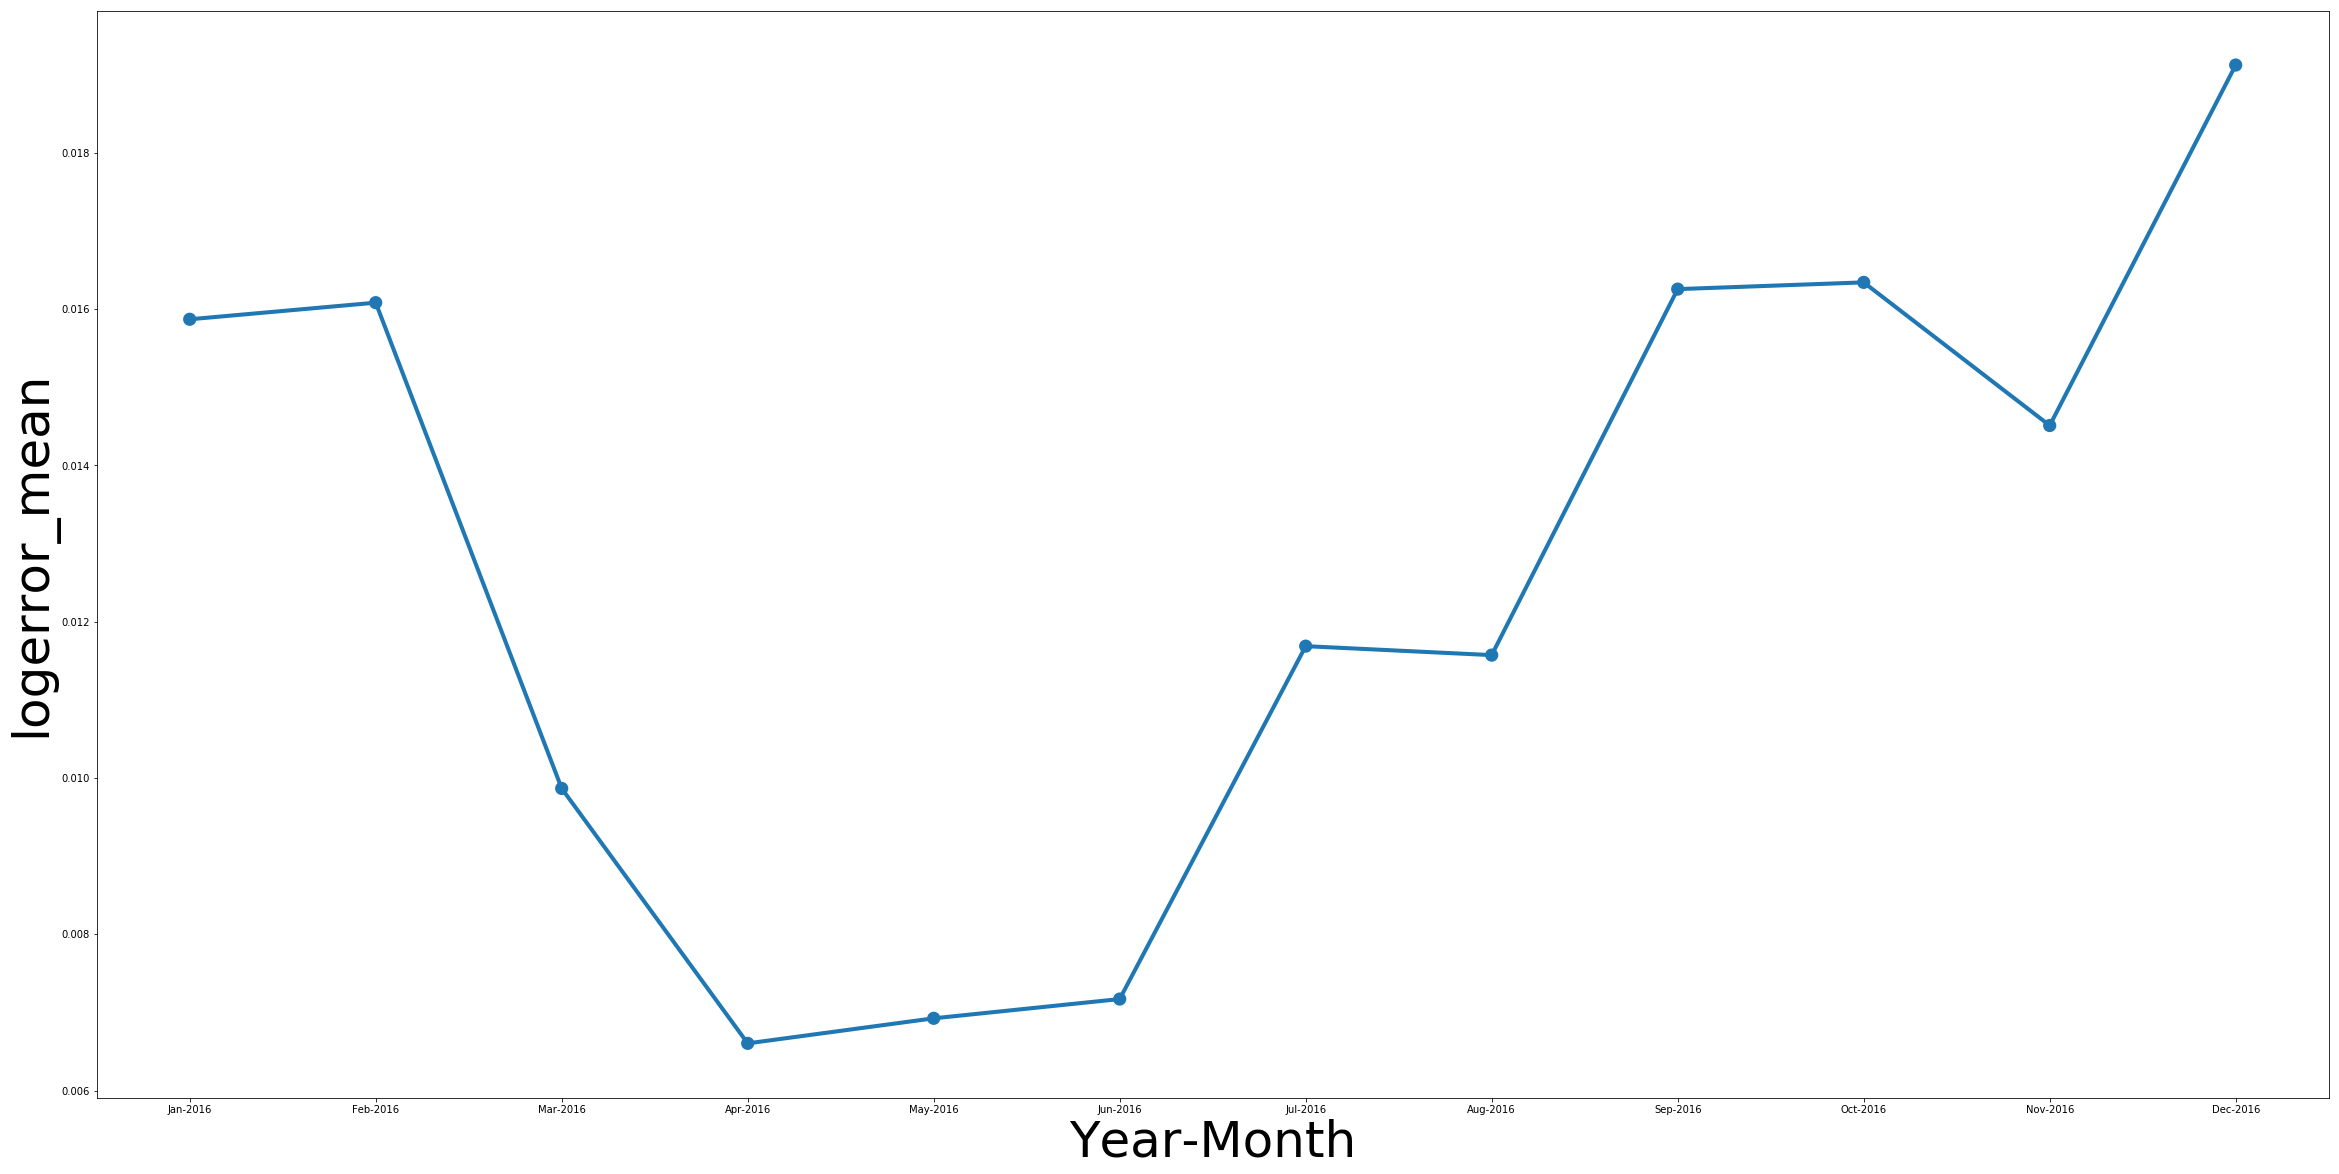

In [62]:
train_df["date"] = pd.to_datetime(train_df["date"])
train_df["year_month"] = train_df["date"].apply(lambda x: x.date().strftime("%b-%Y"))
# train_df["year_month"] = pd.to_datetime(train_df["year_month"])
j = {'logerror' : ['mean']}
grouped_transactions = train_df.groupby(["year_month"]).agg(j).reset_index()
grouped_transactions.columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in grouped_transactions.columns]
grouped_transactions.head()
plt.figure(figsize=(40,20))
# plt.plot(grouped_transactions["year_month"], grouped_transactions["logerror_mean"])
order = ["Jan-2016", "Feb-2016", "Mar-2016", "Apr-2016", "May-2016", "Jun-2016", "Jul-2016", "Aug-2016", "Sep-2016", "Oct-2016", "Nov-2016", "Dec-2016"]
sns.pointplot(x = "year_month", y = "logerror_mean", data = grouped_transactions, markers = ['o'], scale=1.5, order = order)
plt.xlabel("Year-Month", fontsize = 50)
plt.ylabel("logerror_mean", fontsize = 50)
plt.show()

### How many missing values in the data?

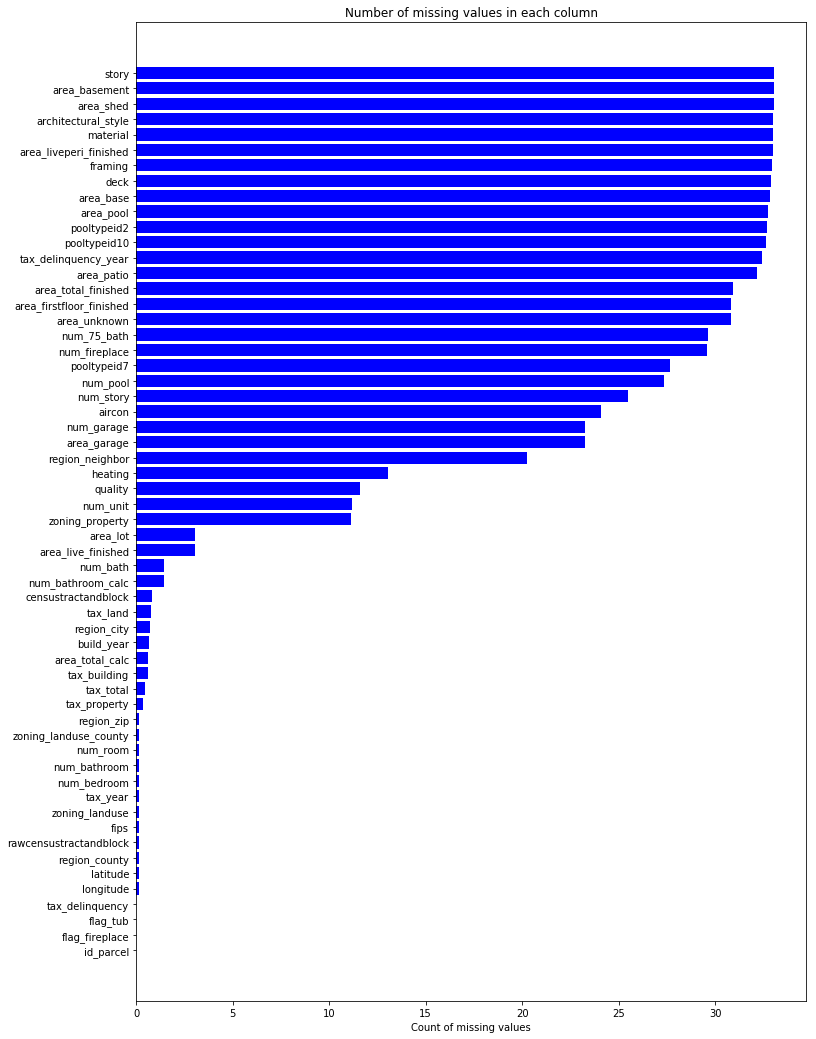

In [68]:
missing_df = properties_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
# missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df['missing_ratio'] = missing_df['missing_count'] / train_df.shape[0]
missing_df = missing_df.sort_values(by='missing_ratio')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_ratio.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [75]:
# missing_df['missing_ratio'].unique()
combined_df = pd.merge(train_df, properties_df, on='id_parcel', how='left')
combined_df.head()

,id_parcel,logerror,date,abs_logerror,year_month,aircon,architectural_style,area_basement,num_bathroom,num_bedroom,framing,quality,num_bathroom_calc,deck,area_firstfloor_finished,area_total_calc,area_live_finished,area_liveperi_finished,area_total_finished,area_unknown,area_base,fips,num_fireplace,num_bath,num_garage,area_garage,flag_tub,heating,latitude,longitude,area_lot,num_pool,area_pool,pooltypeid10,pooltypeid2,pooltypeid7,zoning_landuse_county,zoning_landuse,zoning_property,rawcensustractandblock,region_city,region_county,region_neighbor,region_zip,num_room,story,num_75_bath,material,num_unit,area_patio,area_shed,build_year,num_story,flag_fireplace,tax_building,tax_total,tax_year,tax_land,tax_property,tax_delinquency,tax_delinquency_year,censustractandblock
0,11016594,0.0276,2016-01-01,0.0276,Jan-2016,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,0,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,0,122754.0,360170.0,2015.0,237416.0,6735.88,0,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,0.1684,Jan-2016,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,0,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,0,346458.0,585529.0,2015.0,239071.0,10153.02,0,NaN,NaN
2,12098116,-0.0040,2016-01-01,0.0040,Jan-2016,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,0,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,0,61994.0,119906.0,2015.0,57912.0,11484.48,0,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,0.0218,Jan-2016,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,NaN,839.0,839.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,0,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1987.0,NaN,0,171518.0,244880.0,2015.0,73362.0,3048.74,0,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,0.0050,Jan-2016,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,598.0,0,NaN,33485643.0,-117700234.0,6000.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,NaN,96961.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1981.0,2.0,0,169574.0,434551.0,2015.0,264977.0,5488.96,0,NaN,6.059042e+13


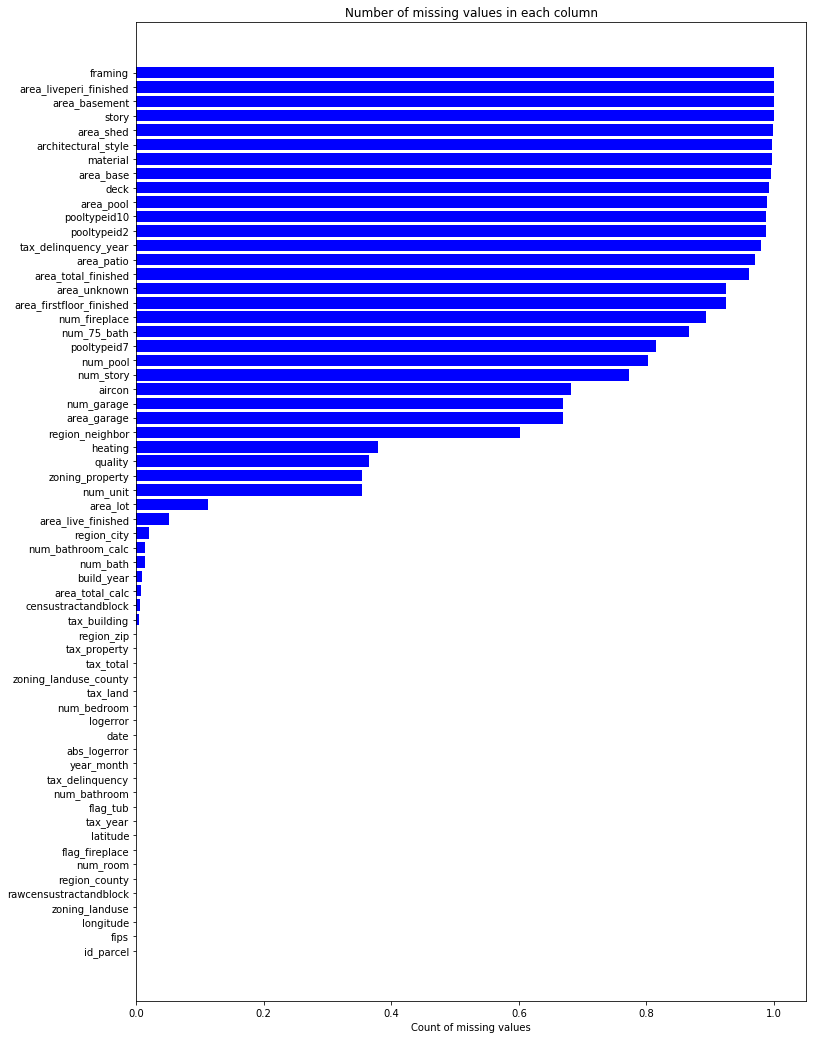

In [76]:
missing_df = combined_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / combined_df.shape[0]
missing_df = missing_df.sort_values(by='missing_ratio')
# missing_df.ix[missing_df['missing_ratio']>0.999]

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_ratio.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

## When are the houses built?

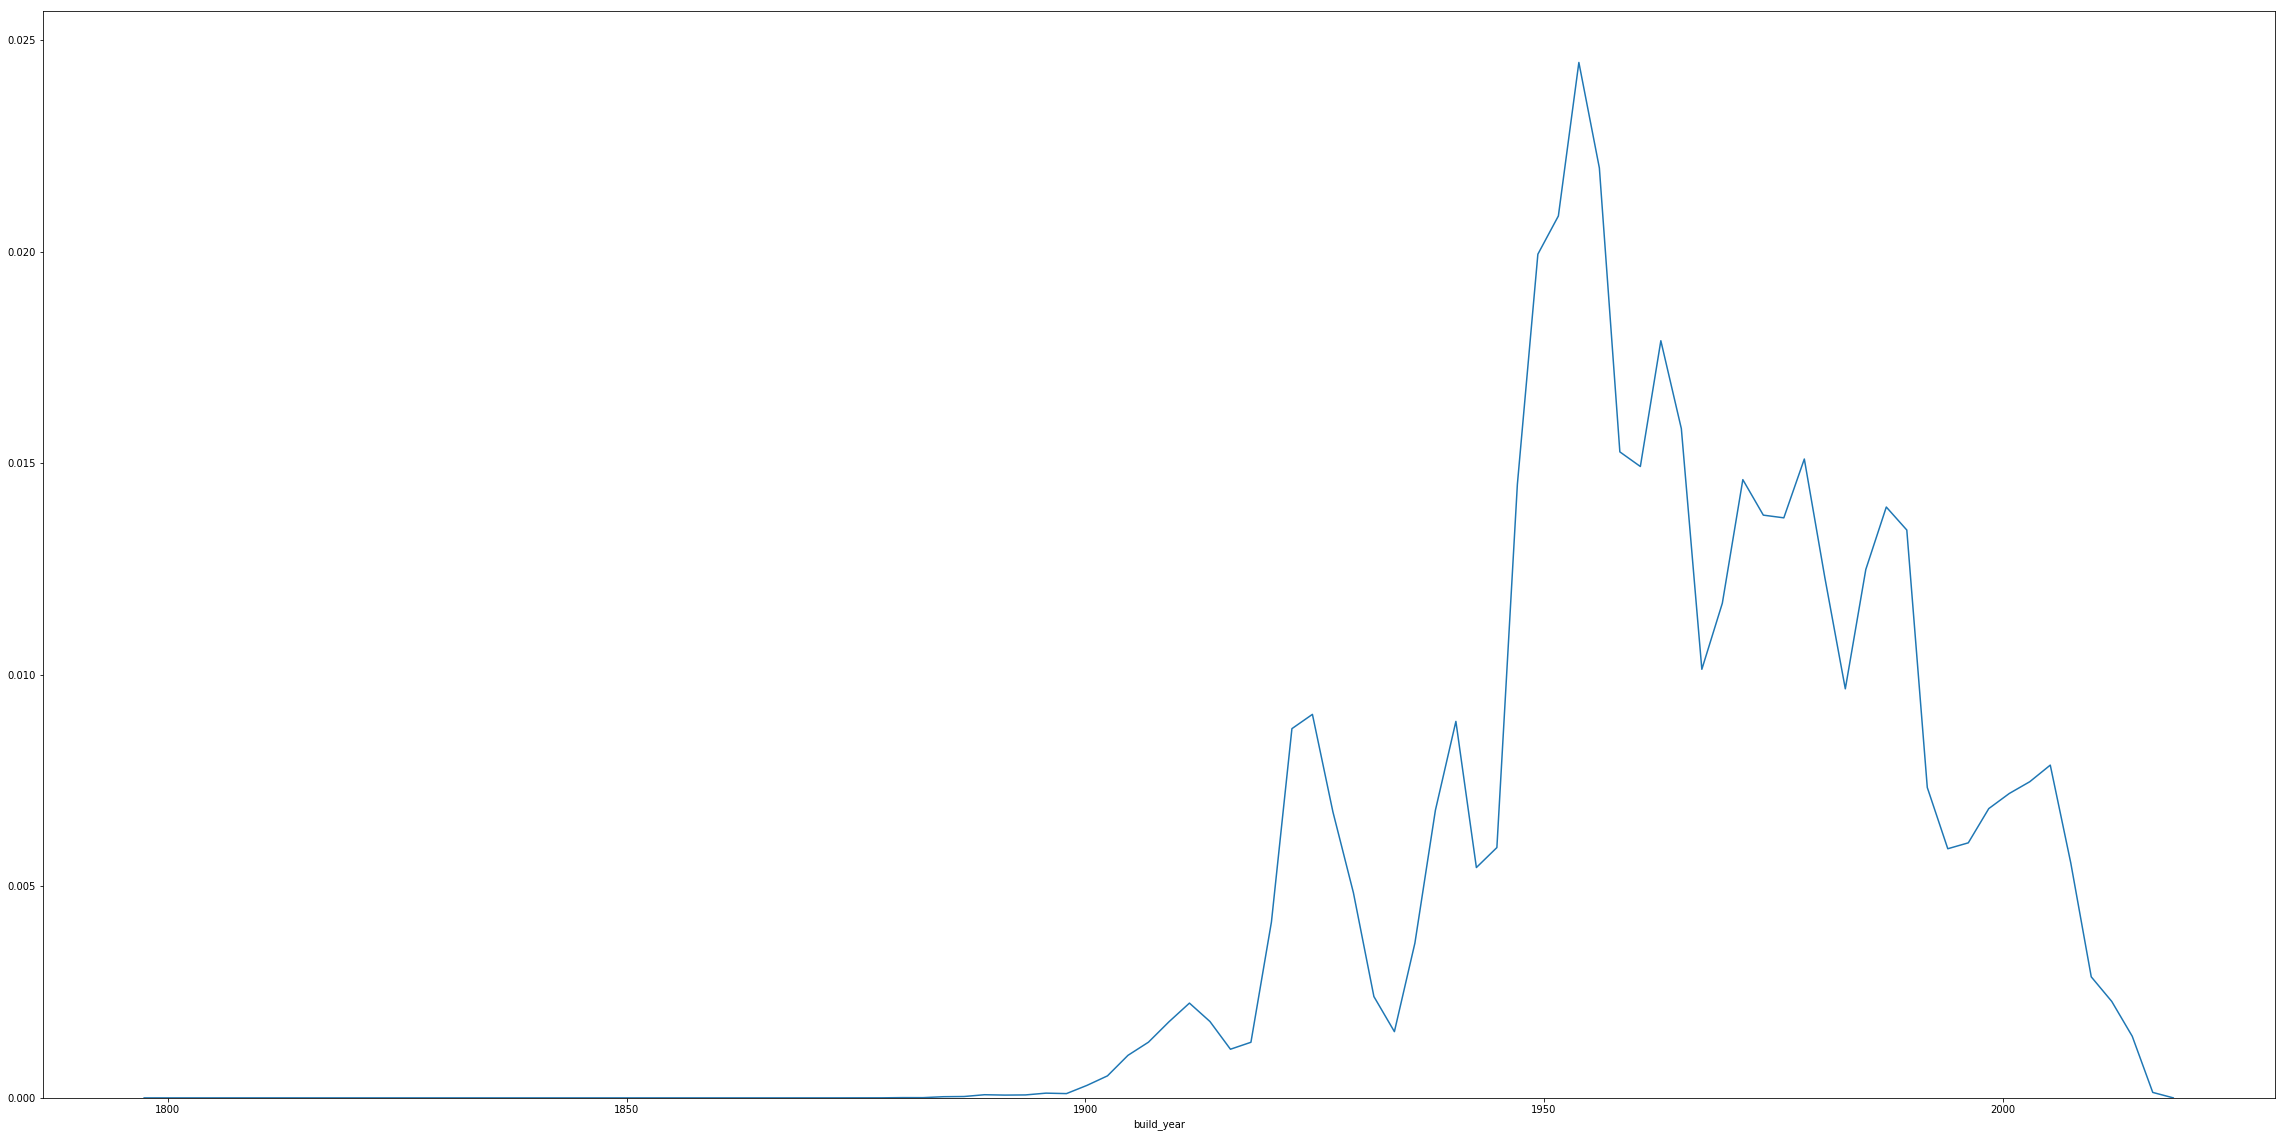

In [83]:
xx = properties_df['build_year'].dropna()
plt.figure(figsize=(40,20))
sns.distplot(xx, hist = False)
plt.show()

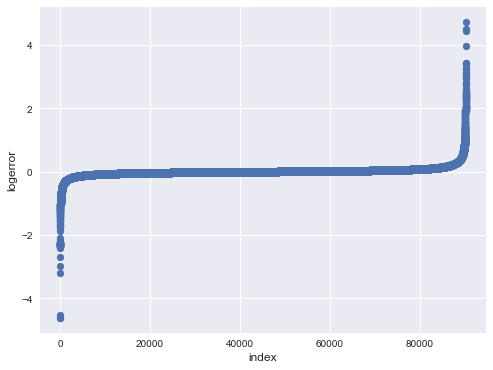

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(train_df.index, np.sort(train_df.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

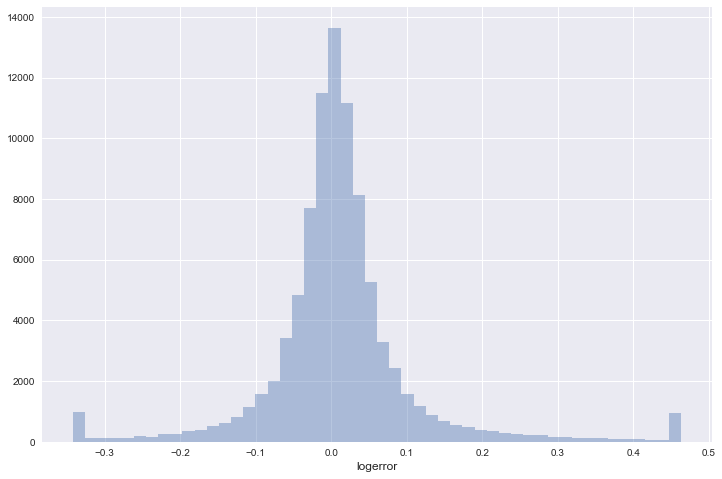

In [10]:
ulimit = np.percentile(train_df.logerror.values, 99)
llimit = np.percentile(train_df.logerror.values, 1)
train_df['logerror'].ix[train_df['logerror']>ulimit] = ulimit
train_df['logerror'].ix[train_df['logerror']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(train_df.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

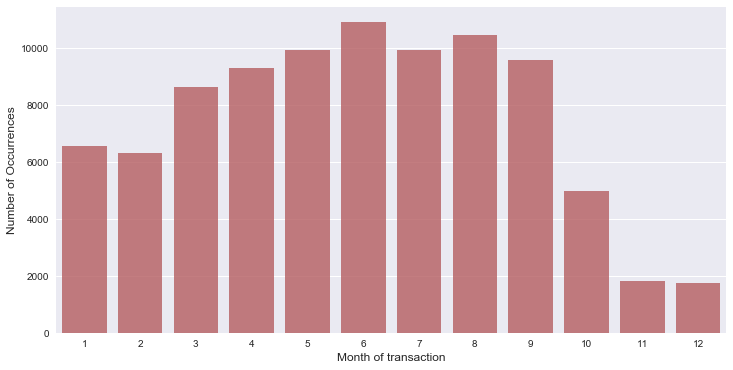

In [11]:
train_df['transaction_month'] = train_df['transactiondate'].dt.month
months = train_df['transaction_month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(months.index, months.values, alpha=0.8, color=color[2])
plt.xticks()
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

In [12]:
prop_df = pd.read_csv("../../Input/properties_2016.csv",low_memory=False)
prop_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


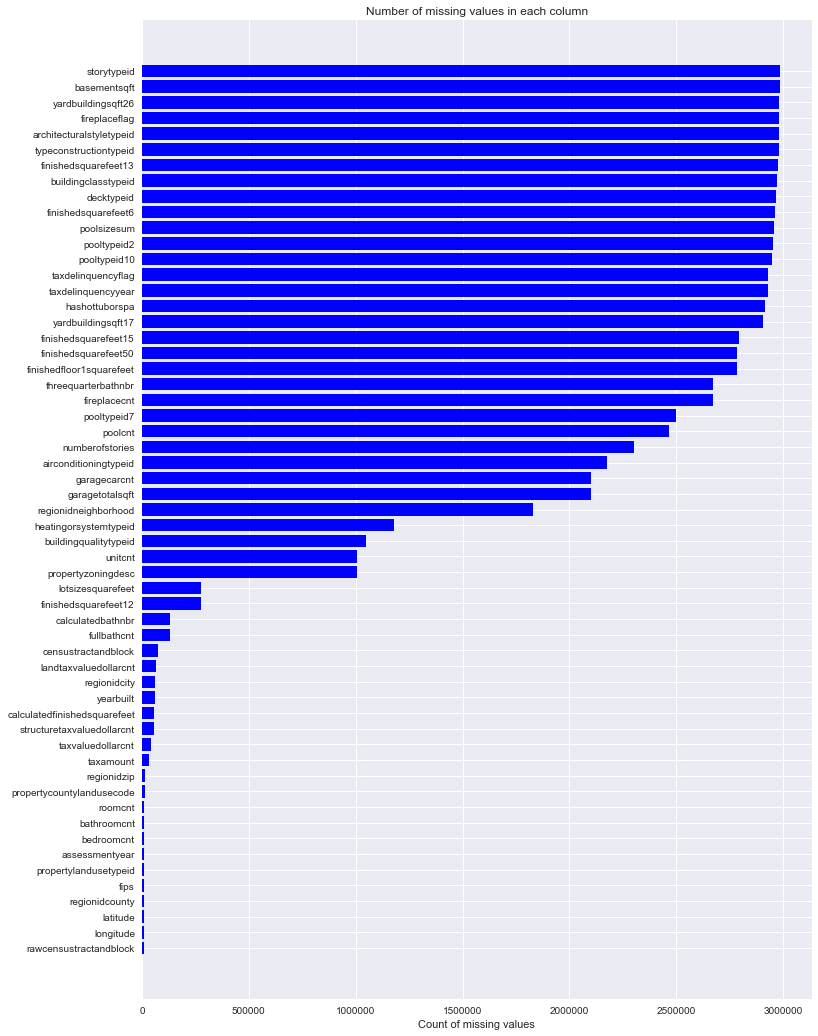

In [22]:
missing_df = prop_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

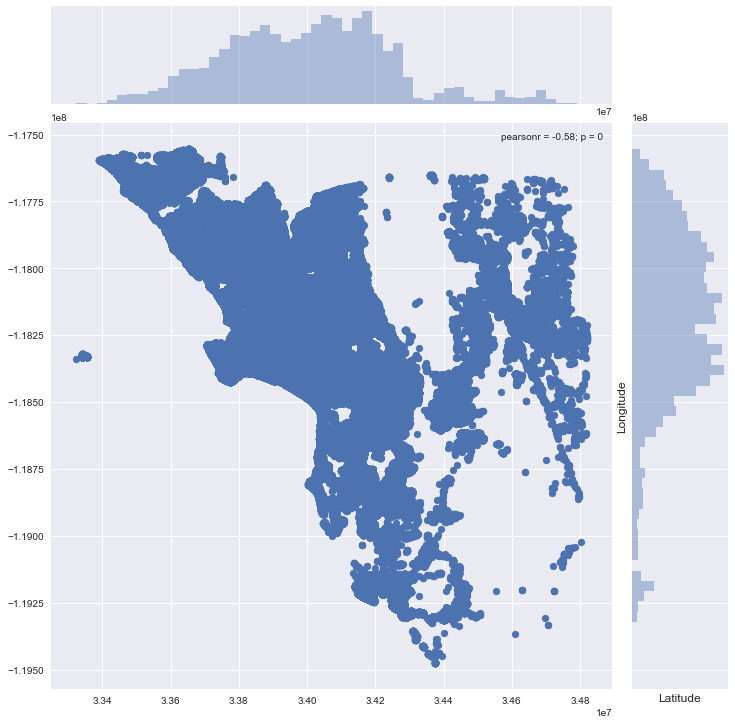

In [26]:
plt.figure(figsize=(12,12))
sns.jointplot(x=prop_df.latitude.values, y=prop_df.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()